In [1]:
pip install tweepy textblob



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install wordcloud==1.9.3


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install xgboost==2.1.1


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


(31962, 3) (31962, 3)
   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
id       0
label    0
tweet    0
dtype: int64


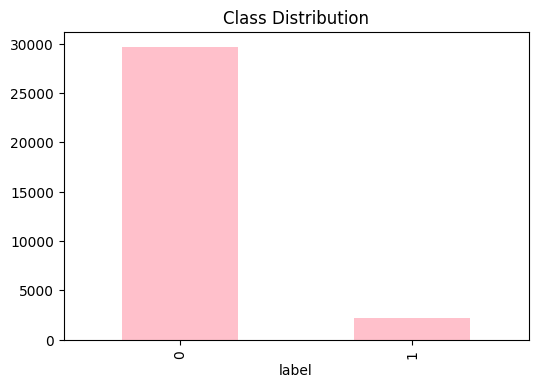

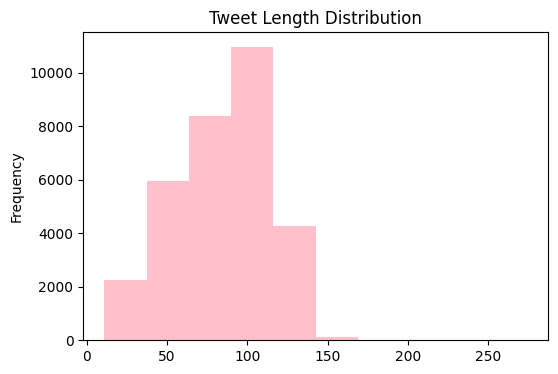

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score
from wordcloud import WordCloud
from xgboost import XGBClassifier

# Load datasets
train = pd.read_csv('/work/train_tweet.csv')
test = pd.read_csv('/work/train_tweet.csv')

# Data summary
print(train.shape, test.shape)
print(train.head())

# Check for missing values
print(train.isnull().sum())

# Plot class distribution
train['label'].value_counts().plot.bar(color='pink', figsize=(6, 4))
plt.title('Class Distribution')
plt.show()

# Length of tweets distribution
train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()
train['len'].plot.hist(color='pink', figsize=(6, 4), title="Tweet Length Distribution")
plt.show()

# Function to clean and preprocess tweets
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def preprocess_tweet(tweet):
    tweet = re.sub('[^a-zA-Z]', ' ', tweet).lower().split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if word not in set(stopwords.words('english'))]
    return ' '.join(tweet)

# Preprocessing train and test tweets
train_corpus = train['tweet'].apply(preprocess_tweet)
test_corpus = test['tweet'].apply(preprocess_tweet)

# Bag of Words representation
cv = CountVectorizer(max_features=2500)
X_train = cv.fit_transform(train_corpus).toarray()
X_test = cv.transform(test_corpus).toarray()
y_train = train['label']

# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

# Function to evaluate models
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    
    print(f"Training Accuracy: {model.score(X_train, y_train):.2f}")
    print(f"Validation Accuracy: {model.score(X_valid, y_valid):.2f}")
    print(f"F1 Score: {f1_score(y_valid, y_pred):.2f}")
    
    cm = confusion_matrix(y_valid, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model.__class__.__name__} Confusion Matrix')
    plt.show()

# Models to evaluate
models = [
    RandomForestClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    XGBClassifier()
]

for model in models:
    evaluate_model(model)

# Wordcloud for visualization
def plot_wordcloud(corpus, title):
    wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color='white').generate(' '.join(corpus))
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

# Plot wordclouds for positive and negative tweets
plot_wordcloud(train['tweet'][train['label'] == 0], 'Positive Words')
plot_wordcloud(train['tweet'][train['label'] == 1], 'Negative Words')


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=daf63d22-6fbe-44ca-9086-82500da82b82' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>